<a href="https://colab.research.google.com/github/hegxy007/EXCEL_Files/blob/main/Co2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Data ##
import pandas as pd
import numpy as np
## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
## Modelling ##
from sklearn.tree import DecisionTreeClassifier

In [3]:
Test_Em.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.02734,8472.313477,41047.93750,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.73724,6476.147323,54915.70858,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.08047,8984.795703,39006.09375,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.99108,6014.724059,57646.36837,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.68514,6849.280477,52896.54187,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


#### LOADING THE DATA

In [2]:
sample = pd.read_csv("/content/sample_submission.csv")
Test_Em= pd.read_csv("/content/test.csv")
Train_Em= pd.read_csv("/content/train.csv")
sample.head()

<ipython-input-2-e6937188081b>:3: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_Em= pd.read_csv("/content/train.csv")


,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94
3,ID_-0.510_29.290_2022_03,81.94
4,ID_-0.510_29.290_2022_04,81.94


In [11]:
Train_Em.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.80957,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.47873,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.89445,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.54734,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.12578,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [8]:
Test_Em.describe

<bound method NDFrame.describe of            ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2022_00    -0.510     29.290  2022        0   
1      ID_-0.510_29.290_2022_01    -0.510     29.290  2022        1   
2      ID_-0.510_29.290_2022_02    -0.510     29.290  2022        2   
3      ID_-0.510_29.290_2022_03    -0.510     29.290  2022        3   
4      ID_-0.510_29.290_2022_04    -0.510     29.290  2022        4   
...                         ...       ...        ...   ...      ...   
24348  ID_-3.299_30.301_2022_44    -3.299     30.301  2022       44   
24349  ID_-3.299_30.301_2022_45    -3.299     30.301  2022       45   
24350  ID_-3.299_30.301_2022_46    -3.299     30.301  2022       46   
24351  ID_-3.299_30.301_2022_47    -3.299     30.301  2022       47   
24352  ID_-3.299_30.301_2022_48    -3.299     30.301  2022       48   

       SulphurDioxide_SO2_column_number_density  \
0                                           NaN   
1          

<Axes: xlabel='week_no', ylabel='year'>

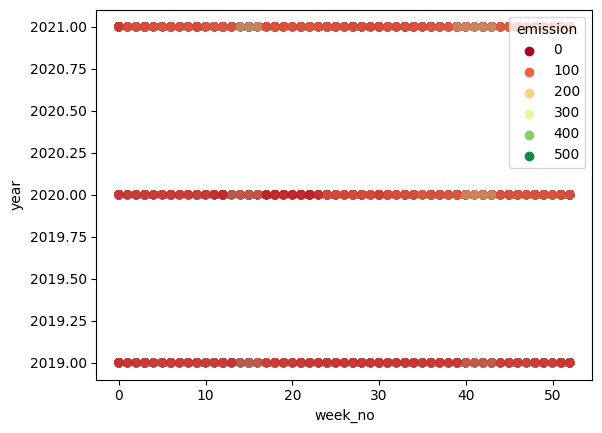

In [23]:
sns.scatterplot(x='week_no', y='year', hue = 'emission', edgecolor = None, alpha = 0.3, palette = "RdYlGn", data=Train_Em, )

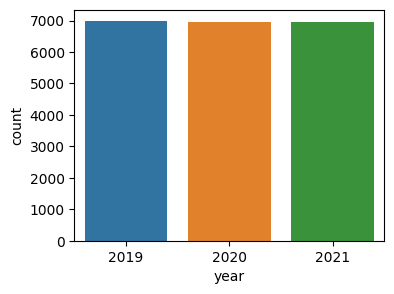

In [27]:
plt.figure(figsize=(4,3))
sns.countplot(x='year',data=Train_Em)
plt.show()

In [26]:
Test_Em.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_surface_albedo          166
Cloud_sensor_azimuth_angle    166
Cloud_sensor_zenith_angle     166
Cloud_solar_azimuth_angle     166
Cloud_solar_zenith_angle      166
Length: 75, dtype: int64

####This is as a result of the missing data it contains null values

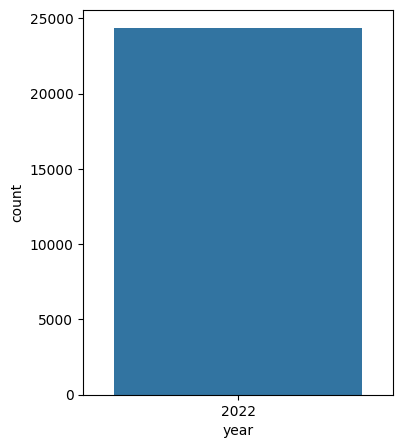

In [22]:
plt.figure(figsize=(4,5))
sns.countplot(x='year',data=Test_Em)
plt.show()

In [29]:
Test_Em.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,24353.0,-1.891072,0.694532,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,24353.0,29.880155,0.810387,28.228000,29.262000,29.883000,30.471000,31.532000
year,24353.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
week_no,24353.0,24.000000,14.142426,0.000000,12.000000,24.000000,36.000000,48.000000
SulphurDioxide_SO2_column_number_density,18211.0,0.000014,0.000234,-0.000977,-0.000122,0.000007,0.000137,0.004110
...,...,...,...,...,...,...,...,...
Cloud_surface_albedo,24187.0,0.256019,0.046614,0.015563,0.229489,0.257279,0.287632,0.507783
Cloud_sensor_azimuth_angle,24187.0,-15.910583,31.296817,-106.794670,-35.621207,-12.945370,4.320550,81.252467
Cloud_sensor_zenith_angle,24187.0,40.078944,6.289530,0.181503,35.431041,41.097947,44.186126,65.118706
Cloud_solar_azimuth_angle,24187.0,-82.411205,35.684048,-148.381015,-119.069505,-75.828261,-46.573705,-22.295398


In [32]:
Test_Em.fillna(Test_Em.mean(),)

<ipython-input-32-f3c1f56015c9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Test_Em.fillna(Test_Em.mean(),)


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,0.000014,0.792570,0.000009,0.139218,9.298052,...,36022.02734,8472.313477,41047.93750,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.73724,6476.147323,54915.70858,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.08047,8984.795703,39006.09375,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.99108,6014.724059,57646.36837,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.68514,6849.280477,52896.54187,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.43041,6260.120033,55483.45998,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,0.000014,0.792570,0.000009,0.139218,9.298052,...,47042.69485,6678.843299,53589.91738,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,0.000014,0.792570,0.000009,0.139218,9.298052,...,55337.14817,5336.282475,62646.76134,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.69143,7188.578533,50728.31399,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


### Exploratory Data Analysis
###### Filling all the Null data with the mean value

In [34]:
Test_Em.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,24353.000000,24353.000000,24353.0,24353.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,...,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000,24187.000000
mean,-1.891072,29.880155,2022.0,24.000000,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,52291.369823,5850.560884,58914.750636,4876.144989,18.219421,0.256019,-15.910583,40.078944,-82.411205,27.984961
std,0.694532,0.810387,0.0,14.142426,0.000234,0.168043,0.000170,0.079865,67.148199,14.156478,...,8474.312135,1385.456558,9137.478850,1363.987819,12.276853,0.046614,31.296817,6.289530,35.684048,4.446146
min,-3.299000,28.228000,2022.0,0.000000,-0.000977,0.339845,-0.000775,0.000000,-106.809900,0.099606,...,22968.371090,1748.440552,26601.015620,1108.339359,1.758491,0.015563,-106.794670,0.181503,-148.381015,14.451874
25%,-2.451000,29.262000,2022.0,12.000000,-0.000122,0.678384,-0.000094,0.078934,-41.627297,26.577654,...,46443.513510,4891.547765,52564.911005,3919.961568,10.090358,0.229489,-35.621207,35.431041,-119.069505,24.359645
50%,-1.882000,29.883000,2022.0,24.000000,0.000007,0.763307,0.000004,0.138999,16.857963,37.310447,...,52026.814650,5813.010892,58725.298900,4828.621533,14.748459,0.257279,-12.945370,41.097947,-75.828261,28.389770
75%,-1.303000,30.471000,2022.0,36.000000,0.000137,0.872586,0.000104,0.200819,73.664560,45.972595,...,57814.509395,6780.095125,64998.470005,5793.453768,22.200969,0.287632,4.320550,44.186126,-46.573705,31.624962
max,-0.510000,31.532000,2022.0,48.000000,0.004110,1.696826,0.002701,0.299973,157.503026,66.243271,...,83092.004250,11840.539740,88543.121460,10840.539720,123.585268,0.507783,81.252467,65.118706,-22.295398,39.770470


### Checking if we need to do Dimensionality reduction

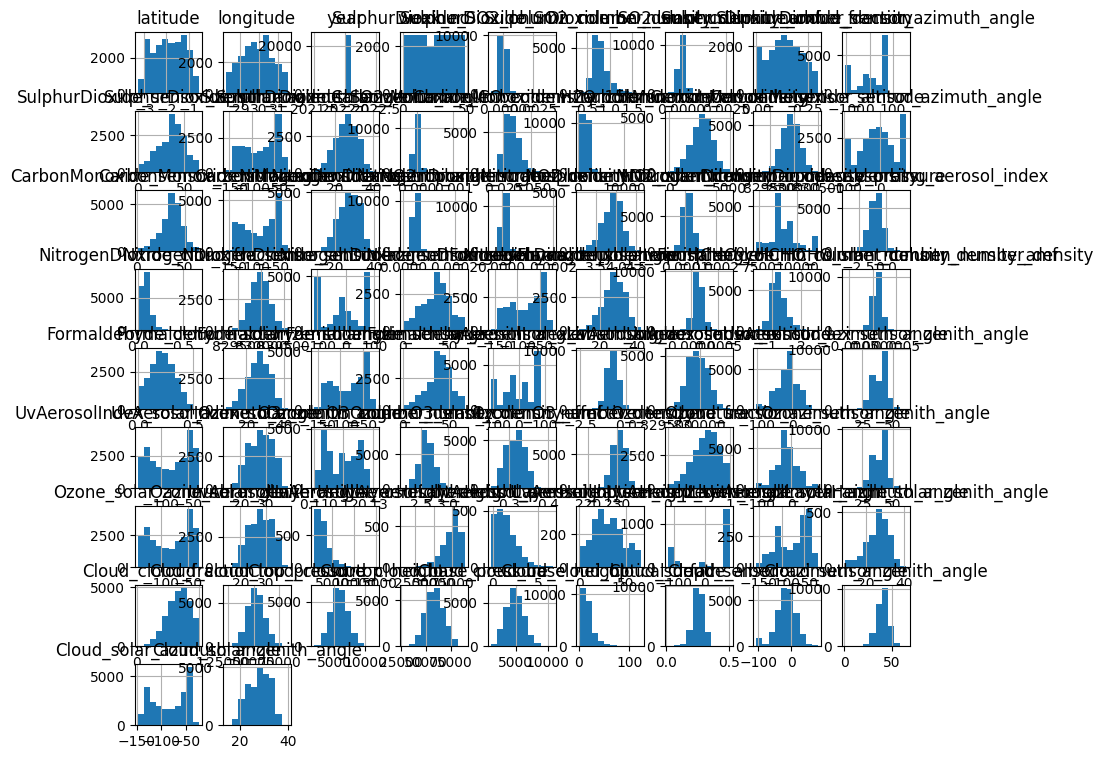

In [47]:
Test_Em.hist( figsize=(10,9))
plt.show()

### Model Traning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [51]:
 x = Train_Em.drop('emission',axis=1)

In [54]:
y = Train_Em['emission'] # Target data

In [55]:
x

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,53534.73242,3664.436218,61085.80957,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,63790.29624,3651.190311,66969.47873,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,55923.79055,4216.986492,60068.89445,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,44569.13064,5228.507736,51064.54734,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,59904.31484,3980.598120,63751.12578,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20902,ID_-1.335_29.465_2020_20,-1.335,29.465,2020,20,0.000160,1.116311,0.000178,0.152183,-11.809430,...,58686.25814,5309.311899,63474.89402,4595.026185,19.601506,0.372009,1.076831,44.702207,-43.967324,31.963146
20903,ID_-1.335_29.465_2020_21,-1.335,29.465,2020,21,-0.000004,1.017080,-0.000006,0.162878,-12.364691,...,64054.18389,4132.640718,69375.85381,3379.601920,8.909830,0.336169,-42.026653,35.361480,-44.543733,33.309924
20904,ID_-1.335_29.465_2020_22,-1.335,29.465,2020,22,-0.000195,0.846768,-0.000151,0.074490,46.457708,...,66592.20965,3616.883069,72917.77192,2791.152641,11.168691,0.303688,16.848841,39.589601,-39.202731,32.254324
20905,ID_-1.335_29.465_2020_23,-1.335,29.465,2020,23,0.000107,0.945529,0.000109,0.240615,-12.686249,...,56601.66806,4885.483469,64123.11157,3885.483472,21.119063,0.287947,-13.029955,42.621336,-39.255778,33.185252


In [56]:
y

0        3.750994
1        4.025176
2        4.231381
3        4.305286
4        4.347317
           ...   
20902    0.064031
20903    0.065077
20904    0.060696
20905    0.076299
20906         NaN
Name: emission, Length: 20907, dtype: float64

# Modeling

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size= 0.2,shuffle= True, random = None,random_state=0)

NameError: ignored